In [ ]:
import numpy as np
import pandas as pd

# Decomposition
!pip install umap-learn
import umap
import sklearn.decomposition as skld
import sklearn.manifold as sklm

# Clustering
import sklearn.cluster as sklc
import scipy.cluster.hierarchy as sch
from sklearn.metrics import calinski_harabasz_score  # A.K.A Pseudo-F Statistic

# Visualization
from matplotlib import pyplot as plt
%matplotlib inline

     |████████████████████████████████| 80 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 14.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=24bd4d2b3874f8b86a3579672f8d5860268a06934abb2fe832b74adb27c2931e
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c5f002819c3ad6725f052a0cc8b0f18b0ffe249c4e50905b7db5f3c6160adc00
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
# Mount drive folder
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Q7/TAED2/TechLoan/TDD/"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path + "committer-level_dataframe.csv")

# Data used by the clustering methods should not include the names of the committers
data = df.loc[:, df.columns != 'COMMITTER']

In [ ]:
def plot_data(data, transform=None, clusters=None, title=None, fig_dim=(5, 5)):
    """
    Displays scatterplot of the data with an optional transformation and clusters.

    > data (no default): The numerical data to be represented in the scatterplot. If
    no transform is indicated, it should be 2D.
    > transform (default None): The dimensionality reduction transform to obtain 
    bidimensional data to represent. Available transforms are: 'umap', 'pca' and 'tnse', 
    although 'pca' is not recommended. If None, no transform is applied to the data
    so it is expected that it already is bidimensional.
    > clusers (default None): array of numeric labels for each data point (same length
    as the number of rows in 'data') to paint each label with a distinct color.
    If None, all data points have the same color.
    > title (default None): adds title to the plot. If None, no title is added.
    > fig_dim (default (5, 5)): tuple of two elements (width,height) representing the size of the dendogram (ignored
    if the dendogram is not visualized).
    """
    if transform is None:
        x = data
    elif transform == "umap":
        x = umap.UMAP().fit_transform(data)
    elif transform == "pca":
        print("Warning: PCA is not recommended for TDD.")
        x = skld.PCA().fit_transform(data)
    elif transform == "tnse":
        TNSEembedder = sklm.TSNE(perplexity=8.0, early_exaggeration=40.0, learning_rate=100,
                             n_iter=1000, min_grad_norm=1e-07, metric='euclidean',
                             random_state=1234, method='exact', n_jobs=-1)
        x = TNSEembedder.fit_transform(data.values)
    else:
        print("transform does not exist")
        return

    fig = plt.figure(figsize=fig_dim)
    if clusters is not None:
        plt.scatter(x[:,0], x[:,1], c = clusters)
    else:
        plt.scatter(x[:,0], x[:,1])
    if title is not None:
        plt.title(title)
    fig.show()

In [ ]:
def hieragglo(data, transform=None, linkage="ward", criteria=None, parameter=None, dendro=False, fig_dim=(20, 8)):
    """
    This function can be used to explore the data visualizing the dendograms without the need to
    define a criteria for the clustering (criteria=None), returning the corresponding linkage
    matrix and, if a criteria is defined, it will return a vector integers representing the
    assigned cluster for each entry.

    > data (no default): dataframe of entries and their features.
    > transform (default None): transformation to be applied to the data.
    > linkage (default ward): string defining the type of linkage used for the linkage matrix ("single",
    "average", "complete", "ward").
    > criteria (default None): If criteria is "n_clusters", function argument 'parameter' will represent
    the number of clusters that will be returned. If criteria is "height", function argument
    'parameter' will represent the height where the dendogram must be cut. Else,
    if criteria is None, no cluster will be returned; use this option to explore
    the data ('parameter' will be ignored).
    > dendro (default None): boolean representing whether the dendogram should be visualized or not.
    > fig_dim (default (20,8)): tuple of two elements (width,height) representing the size of the dendogram (ignored
    if the dendogram is not visualized).
    """
    if type(linkage) is not str or linkage not in {"single", "average", "complete", "ward"}:
        print("ERROR: argument 'linkage' can only have values 'single', 'average', 'complete', 'ward'")
        return

    do_clustering = criteria is not None and parameter is not None

    if transform is not None:
        if transform == "umap":
            x = umap.UMAP().fit_transform(data)
        else:
            print("ERROR: argument 'transform' can only have values 'umap'")
            return None
    else:
        x = data

    linkage_mat = sch.linkage(x, method=linkage)

    if dendro:         # plotting the dendogram
        fig = plt.figure(figsize=fig_dim)
        _ = sch.dendrogram(linkage_mat)
        plt.title(f"Dendrogram (linkage = {linkage})")
        if do_clustering and criteria == "height":
            plt.axhline(y=parameter, color='r', linestyle='--')
        plt.show()

    if do_clustering:  # computing the clusters
        if criteria == "n_clusters":
            clusters = sch.cut_tree(linkage_mat, n_clusters=parameter)
        elif criteria == "height":
            clusters = sch.cut_tree(linkage_mat, height=parameter)
        return clusters
    return None

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


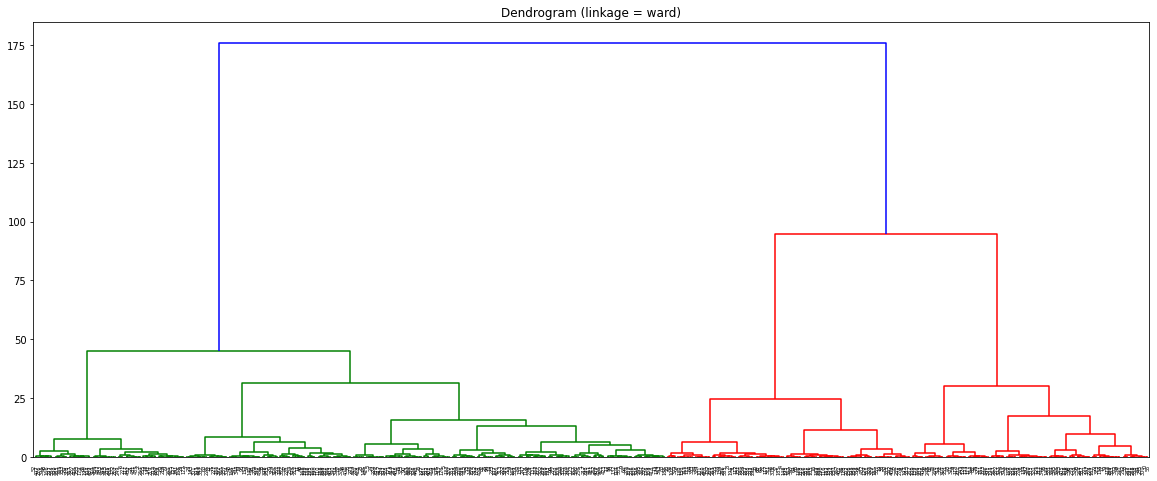

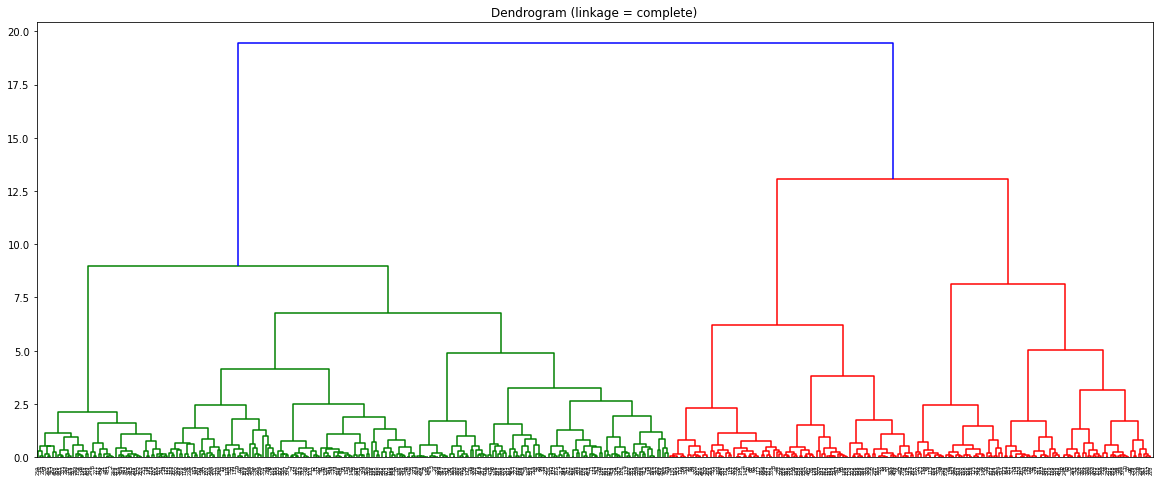

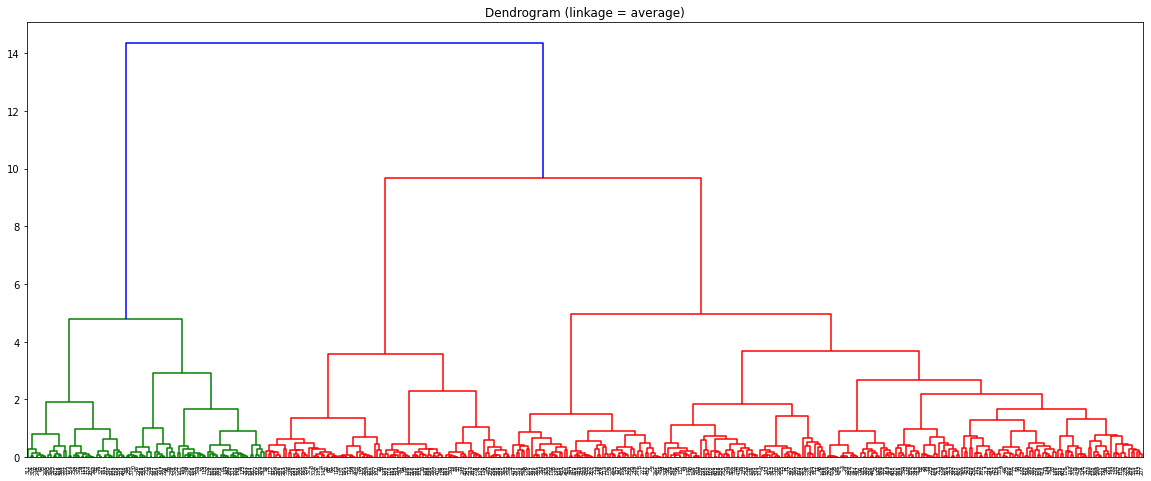

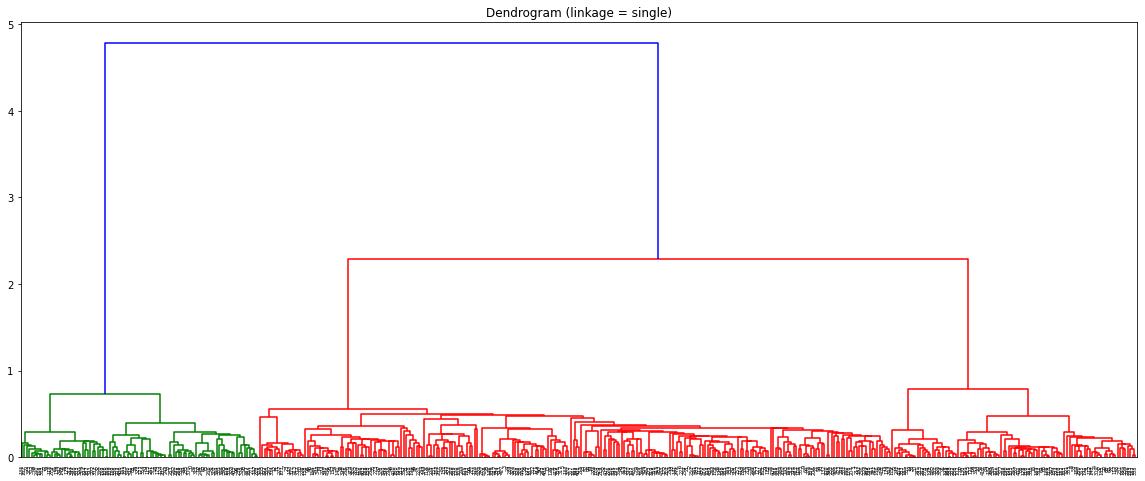

In [ ]:
## Hierarchical agglomerative clustering ##
transformed_data = umap.UMAP().fit_transform(data)

# linkage ward
_ = hieragglo(transformed_data, linkage="ward", dendro=True)

# linkage complete
_ = hieragglo(transformed_data, linkage="complete", dendro=True)

# linkage average
_ = hieragglo(transformed_data, linkage="average", dendro=True)

# linkage single
_ = hieragglo(transformed_data, linkage="single", dendro=True)

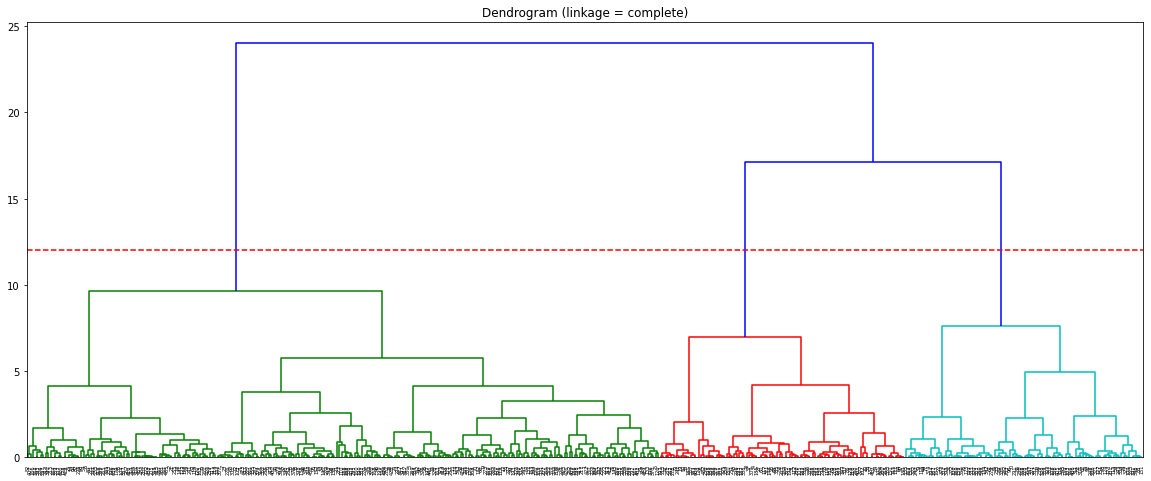

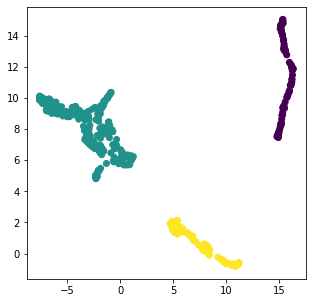

In [ ]:
embedded = umap.UMAP().fit_transform(data)
clusters = hieragglo(embedded, transform=None, linkage="complete", criteria="height", parameter=12, dendro=True)
plot_data(embedded, transform=None, clusters=clusters)

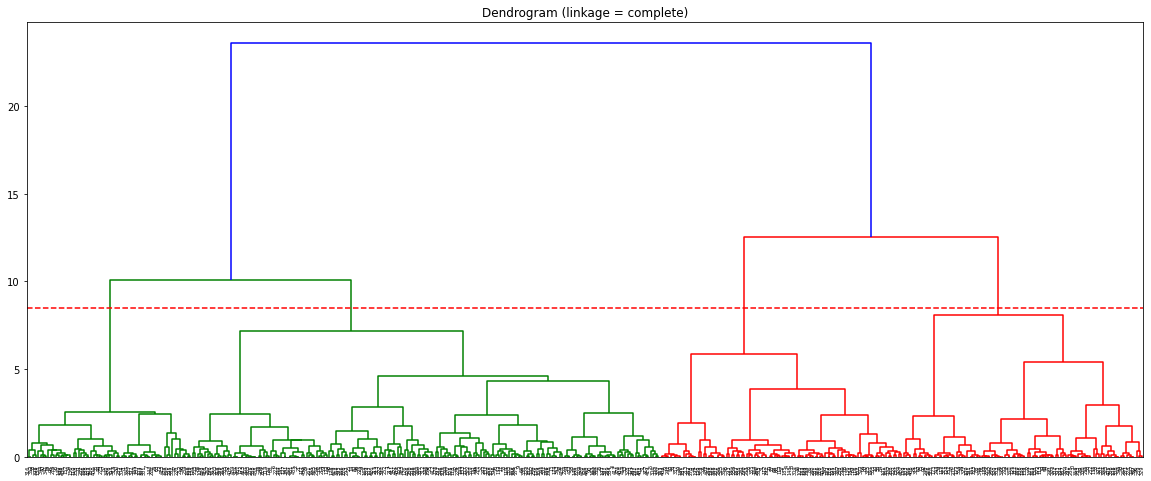

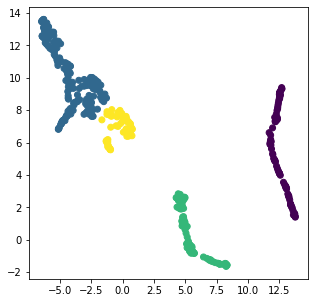

In [ ]:
embedded = umap.UMAP().fit_transform(data)
clusters = hieragglo(embedded, transform=None, linkage="complete", criteria="height", parameter=8.5, dendro=True)
plot_data(embedded, transform=None, clusters=clusters)

In [ ]:
## K Means ##
embedded = umap.UMAP().fit_transform(data)

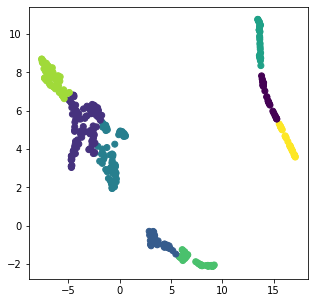

In [ ]:
label = sklc.KMeans(n_clusters=8).fit_predict(embedded)
plot_data(embedded, transform=None, clusters=label)

# Create clusters

In [ ]:
# Always use UMAP transform
embedded = umap.UMAP().fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

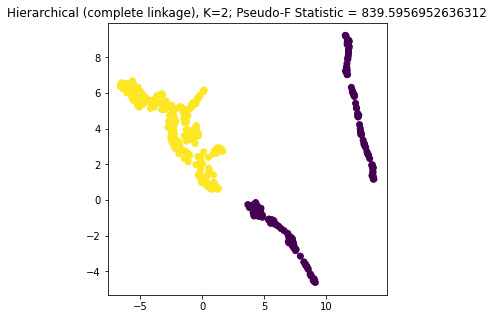

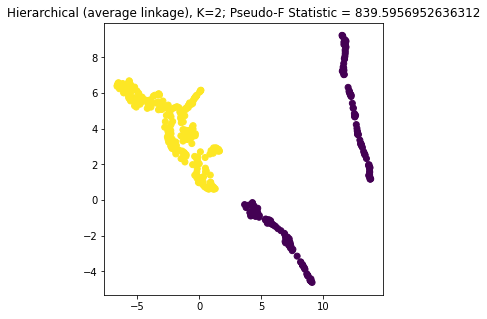

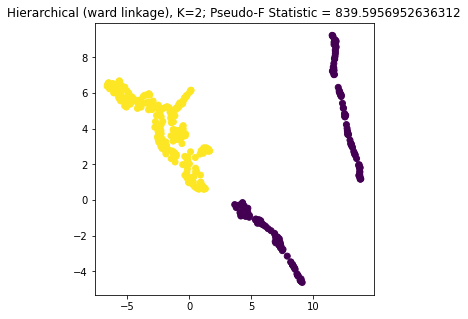

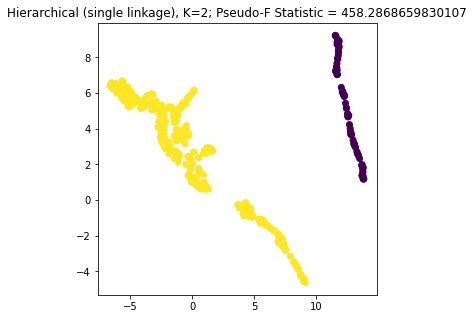

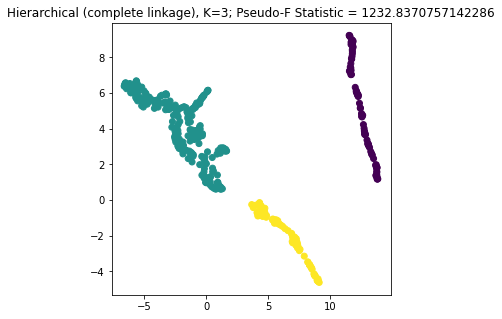

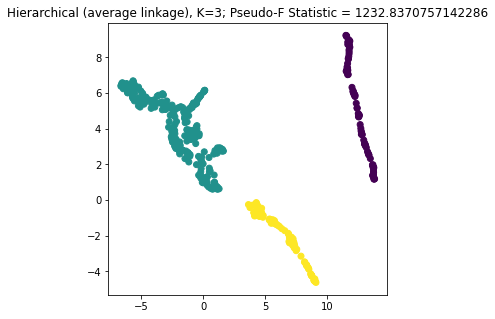

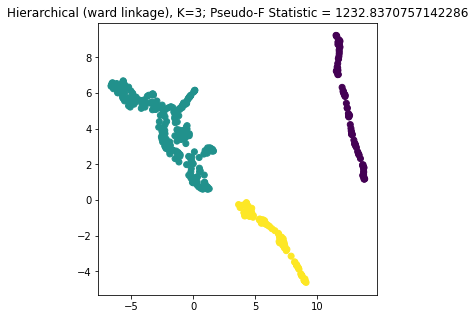

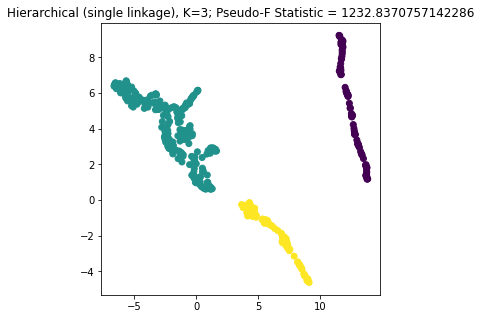

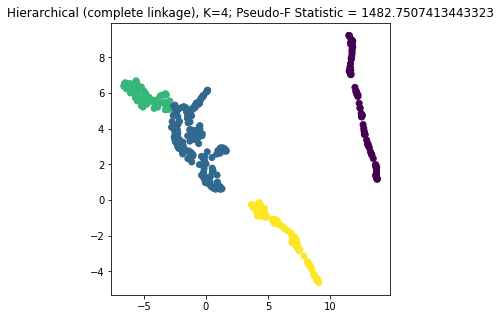

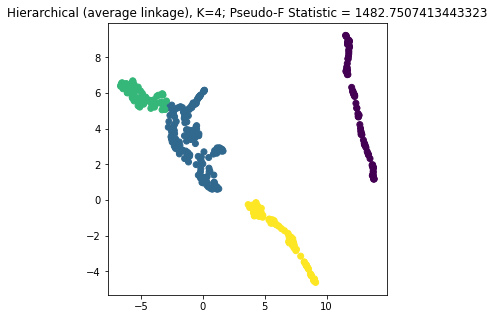

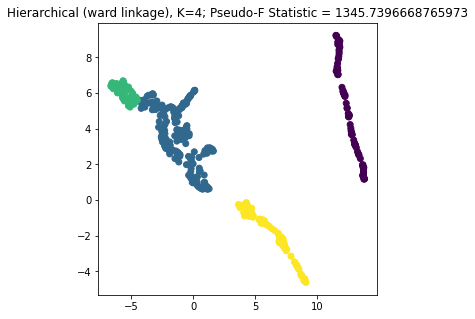

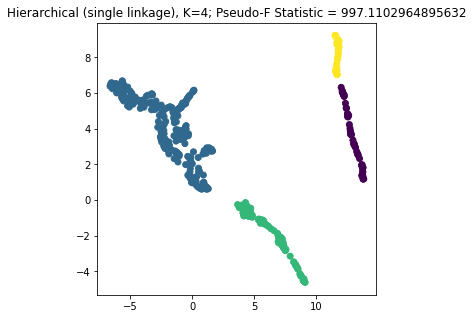

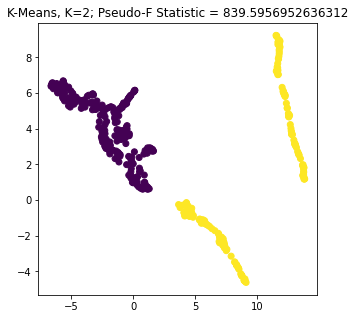

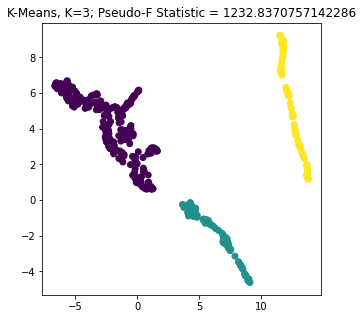

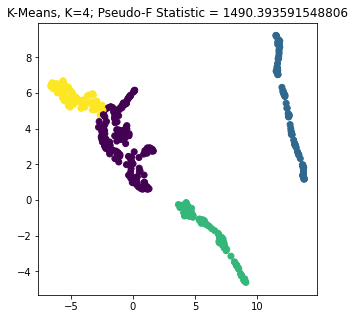

In [ ]:
(1234)
results = {}
for method in ["Hierarchical", "K-Means"]:
    for nclust in [2,3,4]:
        if method == "Hierarchical":
            for linkage in ["complete", "average", "ward", "single"]:
                clusters = hieragglo(embedded, transform=None, linkage=linkage, criteria="n_clusters", parameter=nclust, dendro=False)
                pseudoF = calinski_harabasz_score(embedded, labels=clusters)
                resstr = f"{method} ({linkage} linkage), K={nclust}"
                plot_data(embedded, transform=None, clusters=clusters, title=resstr + f"; Pseudo-F Statistic = {pseudoF}")
                results[resstr] = pseudoF
        elif method == "K-Means":
                clusters = sklc.KMeans(n_clusters=nclust, random_state=1234).fit_predict(embedded)
                pseudoF = calinski_harabasz_score(embedded, labels=clusters)
                resstr = f"{method}, K={nclust}"
                plot_data(embedded, transform=None, clusters=clusters, title=resstr + f"; Pseudo-F Statistic = {pseudoF}")
                results[resstr] = pseudoF

K-Means, K=4                            1490.393591548806
Hierarchical (complete linkage), K=4    1482.7507413443323
Hierarchical (average linkage), K=4     1482.7507413443323
Hierarchical (ward linkage), K=4        1345.7396668765973
Hierarchical (complete linkage), K=3    1232.8370757142286
Hierarchical (average linkage), K=3     1232.8370757142286
Hierarchical (ward linkage), K=3        1232.8370757142286
Hierarchical (single linkage), K=3      1232.8370757142286
K-Means, K=3                            1232.8370757142286
Hierarchical (single linkage), K=4      997.1102964895632
Hierarchical (complete linkage), K=2    839.5956952636312
Hierarchical (average linkage), K=2     839.5956952636312
Hierarchical (ward linkage), K=2        839.5956952636312
K-Means, K=2                            839.5956952636312
Hierarchical (single linkage), K=2      458.2868659830107


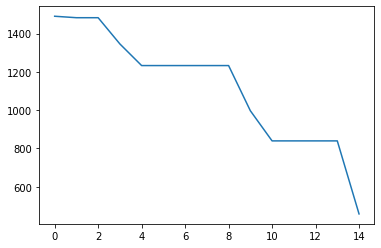

In [ ]:
results_sorted = sorted(results.items(), key=lambda t: -t[1])
plt.plot([n for _,n in results_sorted])
for resstr, n in results_sorted:
    print(resstr + " "*max(2, 40-len(resstr)) + str(n))

In [ ]:
## Best clusters for k=3 and k=4 ## 
c3 = hieragglo(embedded, transform=None, linkage="complete", criteria="n_clusters", parameter=3, dendro=False)
c4 = sklc.KMeans(n_clusters=4).fit_predict(embedded)

In [ ]:
groups_c3 = [data[c3 == i] for i in np.unique(c3)]
groups_c4 = [data[c4 == i] for i in np.unique(c4)]

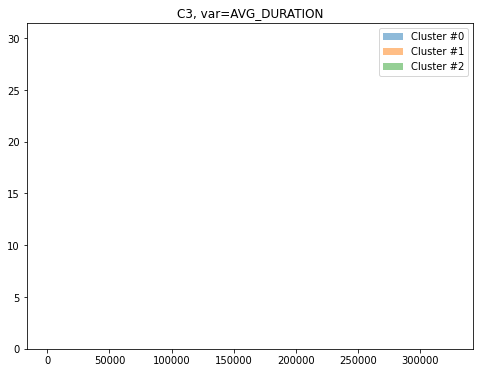

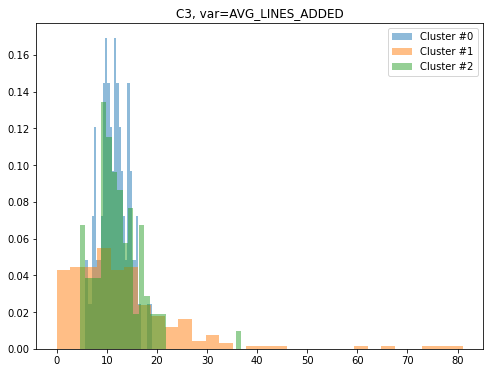

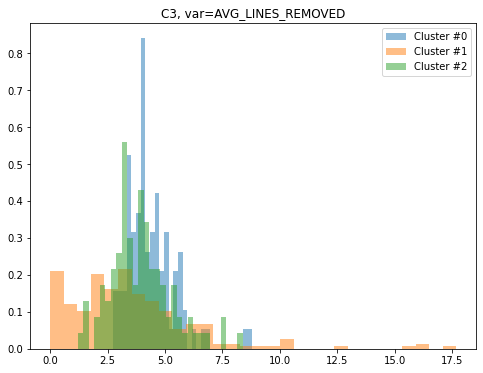

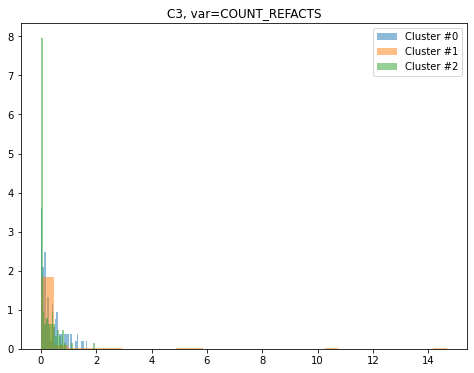

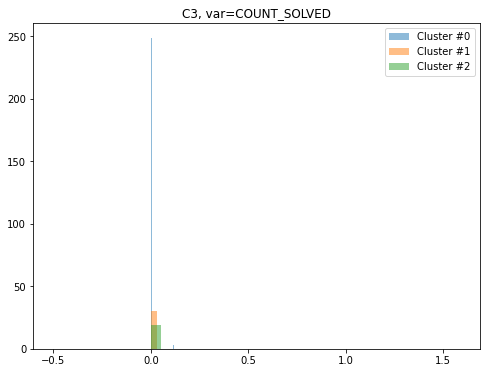

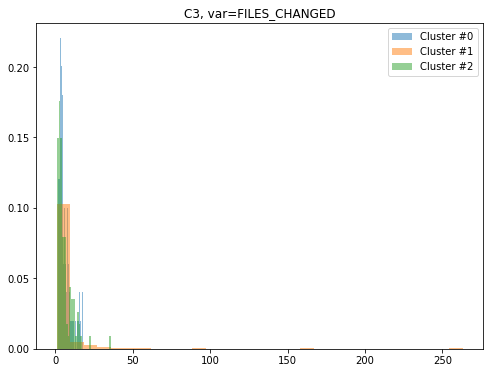

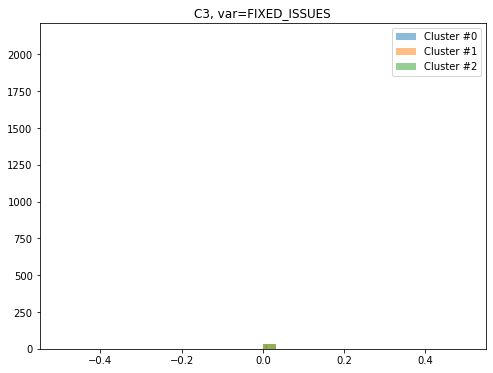

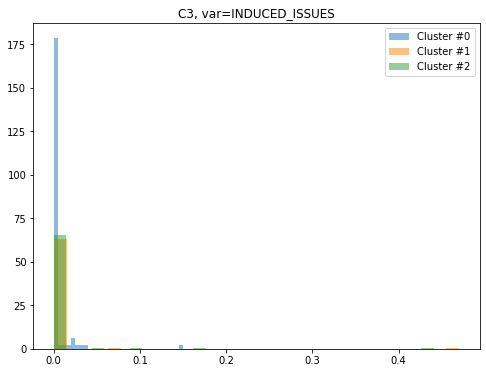

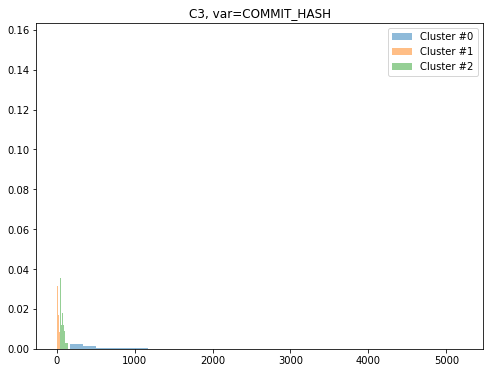

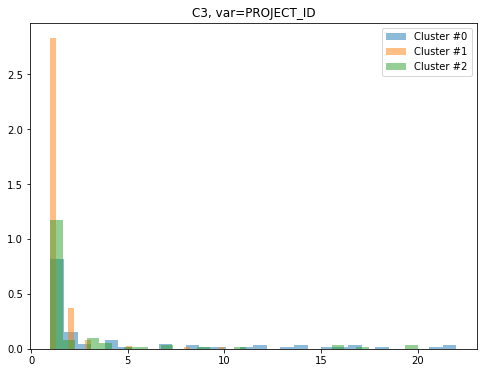

In [ ]:
for var in data.columns:
    plt.figure(figsize=(8,6))
    plt.hist(groups_c3[0][var], bins=30, density=True, alpha=0.5, label=f"Cluster #{0}")
    plt.hist(groups_c3[1][var], bins=30, density=True, alpha=0.5, label=f"Cluster #{1}")
    plt.hist(groups_c3[2][var], bins=30, density=True, alpha=0.5, label=f"Cluster #{2}")
    plt.title(f"C3, var={var}")
    plt.legend()
    plt.show()

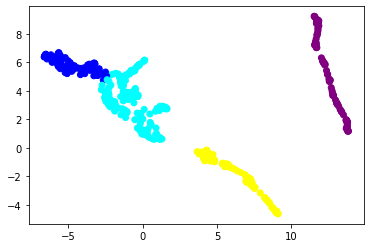

In [ ]:
col = {0:"blue", 1:"yellow", 2:"purple", 3:"cyan"}
c = np.array([col[clust] for clust in clusters])

plt.scatter(embedded[:,0], embedded[:,1], c = c)

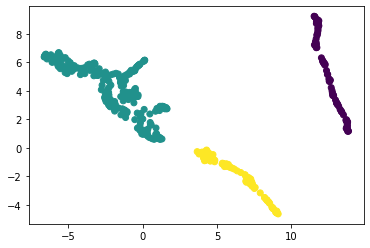

In [ ]:
plt.scatter(embedded[:,0], embedded[:,1], c = c3)